#Name: Kunal Nalawade

#UID: 2018130031

## Experiment 2: Experiment on studying different CNN architectures

#### Aim: To try and implement a CNN on a chosen dataset

#### Dataset selected: Cats vs. Dogs
It is binary classification. The CNN predicts whether the image is that of a cat or of a dog




In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete102HMY/cats_vs_dogs-train.tfrecord


Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
0 4980
1 5020


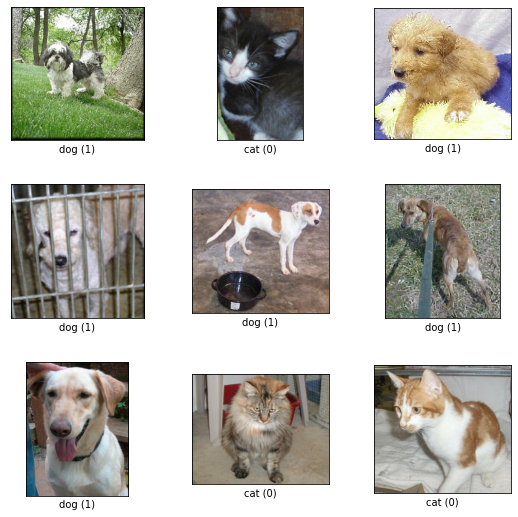

In [ ]:
(train_ds, val_ds), train_info = tfds.load('cats_vs_dogs', split=['train[:10000]', 'train[10000:11500]'], shuffle_files=True, with_info=True, as_supervised=True)
test_ds = tfds.load('cats_vs_dogs', split='train[11500:]', shuffle_files=True, as_supervised=True)

vals = np.unique(np.fromiter(train_ds.map(lambda x, y: y), float), return_counts=True)

for val, count in zip(*vals):
    print(int(val), count)

fig = tfds.show_examples(train_ds, train_info)

In [ ]:
train_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})

In [ ]:
# Normalize the image
def normalize_img(image, label):
  image = tf.image.resize(image, (224, 224))/255.0
  return image, label

train_ds = train_ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_ds = train_ds.cache()
train_ds = train_ds.shuffle(10000)
train_ds = train_ds.batch(64)
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

val_ds = val_ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache()
val_ds = val_ds.batch(64)
val_ds = val_ds.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
l2_val = l2(0.0005)
# Train the model
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=l2_val,activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_regularizer=l2_val,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',kernel_regularizer=l2_val,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512,activation='relu',kernel_regularizer=l2_val))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))
# adam optimizer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 128)      

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=25)

Epoch 1/25
157/157 [==============================] - 21s 69ms/step - loss: 1.6089 - accuracy: 0.6551 - val_loss: 1.8138 - val_accuracy: 0.5220
Epoch 2/25
157/157 [==============================] - 8s 49ms/step - loss: 1.0306 - accuracy: 0.7684 - val_loss: 4.0207 - val_accuracy: 0.5133
Epoch 3/25
157/157 [==============================] - 8s 49ms/step - loss: 0.8085 - accuracy: 0.8282 - val_loss: 1.4895 - val_accuracy: 0.5300
Epoch 4/25
157/157 [==============================] - 8s 50ms/step - loss: 0.7521 - accuracy: 0.8473 - val_loss: 1.3220 - val_accuracy: 0.6480
Epoch 5/25
157/157 [==============================] - 8s 50ms/step - loss: 0.7930 - accuracy: 0.8674 - val_loss: 0.8803 - val_accuracy: 0.7927
Epoch 6/25
157/157 [==============================] - 8s 50ms/step - loss: 0.7142 - accuracy: 0.8901 - val_loss: 1.0634 - val_accuracy: 0.7520
Epoch 7/25
157/157 [==============================] - 8s 49ms/step - loss: 0.6868 - accuracy: 0.9184 - val_loss: 1.3034 - val_accuracy: 0.695

In [ ]:
scores=model.evaluate(train_ds,test_ds,verbose=0)
print('Testing data accuracy',scores[1]*100,'%')

Testing data accuracy 88.54 %


##Conclusion
1. In Convolutional neural network(CNN), a neuron in a layer will only be connected to a small region of neurons in the previous layer, as opposed to fully connected networks. That is why, it is used in image recognition.
2. In CNN, the model is passed goes through a convolution layer, activation i.e. relu layer and after further normalization it is passed through a pooling layer where the image is shrinked further.
3. These layers are stacked one after the other until the image is represented as a single list.
4. The model goes through a dense layer and further optimized using adam optimization which makes the model ready for evaluation.
5. The model is evaluated for 25 epochs and the final accuracy was found to be 88.54%.